In [40]:
import math

FERROMAGNET: bool = True # Ferromagnet or permanent magnet

mu_0: float = 0.0000012566
N: float = 500
l: float = 0.1
U_0: float = 50
C: float = 0.11
R: float = 1.2
M: float = 1000000
radius: float = 0.006 # Projectile radius if sphere
V: float = 4*math.pi*radius*radius*radius/3
m: float = M * V
mass: float = 0.008

air_density: float = 1.293
drag_coeff: float = 0.47
A: float = radius * radius * math.pi

chi_v: float = 200000 # Volume magnetic susceptibility of iron (dimensionless)
M_max: float = 1700000 # Saturation magnetization of iron

z: float = -l/2
v: float = 0
dt: float = 0.000001
t: float = 0
middle_time: float = 0

positions: list[float] = []
velocities: list[float] = []
accelerations: list[float] = []
currents: list[float] = []
magnetizations: list[float] = []

while t < 2:
    U: float = U_0 * math.exp(-t / (R*C))
    I: float = U / R
    zpos: float = math.pow(z+l/2, 2)
    zneg: float = math.pow(z-l/2, 2)
    R2: float = R*R
    B: float = mu_0*N*I/2 * (
        (z+l/2) / (l * math.pow(R2 + zpos, 1/2)) -
        (z-l/2) / (l * math.pow(R2 + zneg, 1/2))
    )
    B_delta: float = mu_0*N*I/2 * (
        zneg / (l * math.pow(R2 + zneg, 3/2)) -
        1 / (l * math.pow(R2 + zneg, 1/2)) +
        1 / (l * math.pow(R2 + zpos, 1/2)) -
        zpos / (l * math.pow(R2 + zpos, 3/2))
    )
    H: float = B / mu_0
    if FERROMAGNET:
        M = min(chi_v * H, M_max)
        m = M * V
    F: float = m * B_delta
    a: float = F / mass
    drag: float = air_density * v*v * drag_coeff * A / 2
    v += (a - drag) * dt
    z += v * dt

    # print(f"time: {t}, pos: {z}, velo: {v}, accel: {a}, I: {I}")
    positions.append(z)
    velocities.append(v)
    accelerations.append(a)
    currents.append(I)
    magnetizations.append(M)
    if z < 0:
        middle_time = math.ceil(t/dt)
    #     print(middle_time)
    t += dt

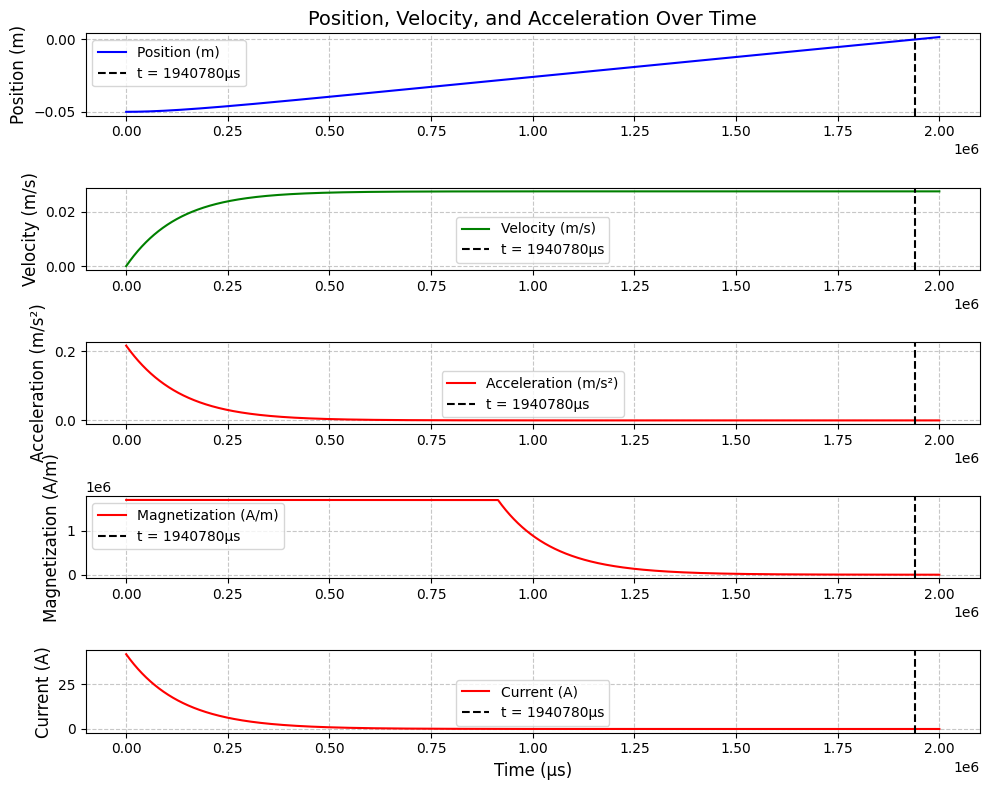

In [41]:
import matplotlib.pyplot as plt
import numpy as np

position = np.array(positions)
velocity = np.array(velocities)
acceleration = np.array(accelerations)
magnetization = np.array(magnetizations)
current = np.array(currents)

time = np.arange(len(velocity))

# Create the subplots
plt.figure(figsize=(10, 8)) # type: ignore

# Position subplot
plt.subplot(5, 1, 1) # type: ignore
plt.plot(time, position, label='Position (m)', color='blue')
plt.axvline(middle_time, color='black', linestyle='--', label=f't = {middle_time}µs')
plt.title('Position, Velocity, and Acceleration Over Time', fontsize=14)
plt.ylabel('Position (m)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Velocity subplot
plt.subplot(5, 1, 2)
plt.plot(time, velocity, label='Velocity (m/s)', color='green')
plt.axvline(middle_time, color='black', linestyle='--', label=f't = {middle_time}µs')
plt.ylabel('Velocity (m/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Acceleration subplot
plt.subplot(5, 1, 3)
plt.plot(time, acceleration, label='Acceleration (m/s²)', color='red')
plt.axvline(middle_time, color='black', linestyle='--', label=f't = {middle_time}µs')
plt.ylabel('Acceleration (m/s²)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Magnetization subplot
plt.subplot(5, 1, 4)
plt.plot(time, magnetization, label='Magnetization (A/m)', color='red')
plt.axvline(middle_time, color='black', linestyle='--', label=f't = {middle_time}µs')
plt.ylabel('Magnetization (A/m)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Current subplot
plt.subplot(5, 1, 5)
plt.plot(time, current, label='Current (A)', color='red')
plt.axvline(middle_time, color='black', linestyle='--', label=f't = {middle_time}µs')
plt.xlabel('Time (µs)', fontsize=12)
plt.ylabel('Current (A)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show() # type: ignore
